# Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
import time

# Loading Dataset

In [69]:
# df3= pd.read_csv("/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/skin Project/hmnist_28_28_RGB.csv") # running on colab

In [70]:
df= pd.read_csv("G://My Drive\\Ai Training MetaPi\\Week_6_Deep_Learning\\skin Project\\hmnist_28_28_RGB.csv") # For running on my Local Machine

In [71]:
# Splitting data into features and labels

In [72]:
X= df.drop('label',axis=1)
Y= df[['label']]

*Converting data into NumPy Array*

In [73]:
X= np.array(X)

In [74]:
Y=np.array(Y)

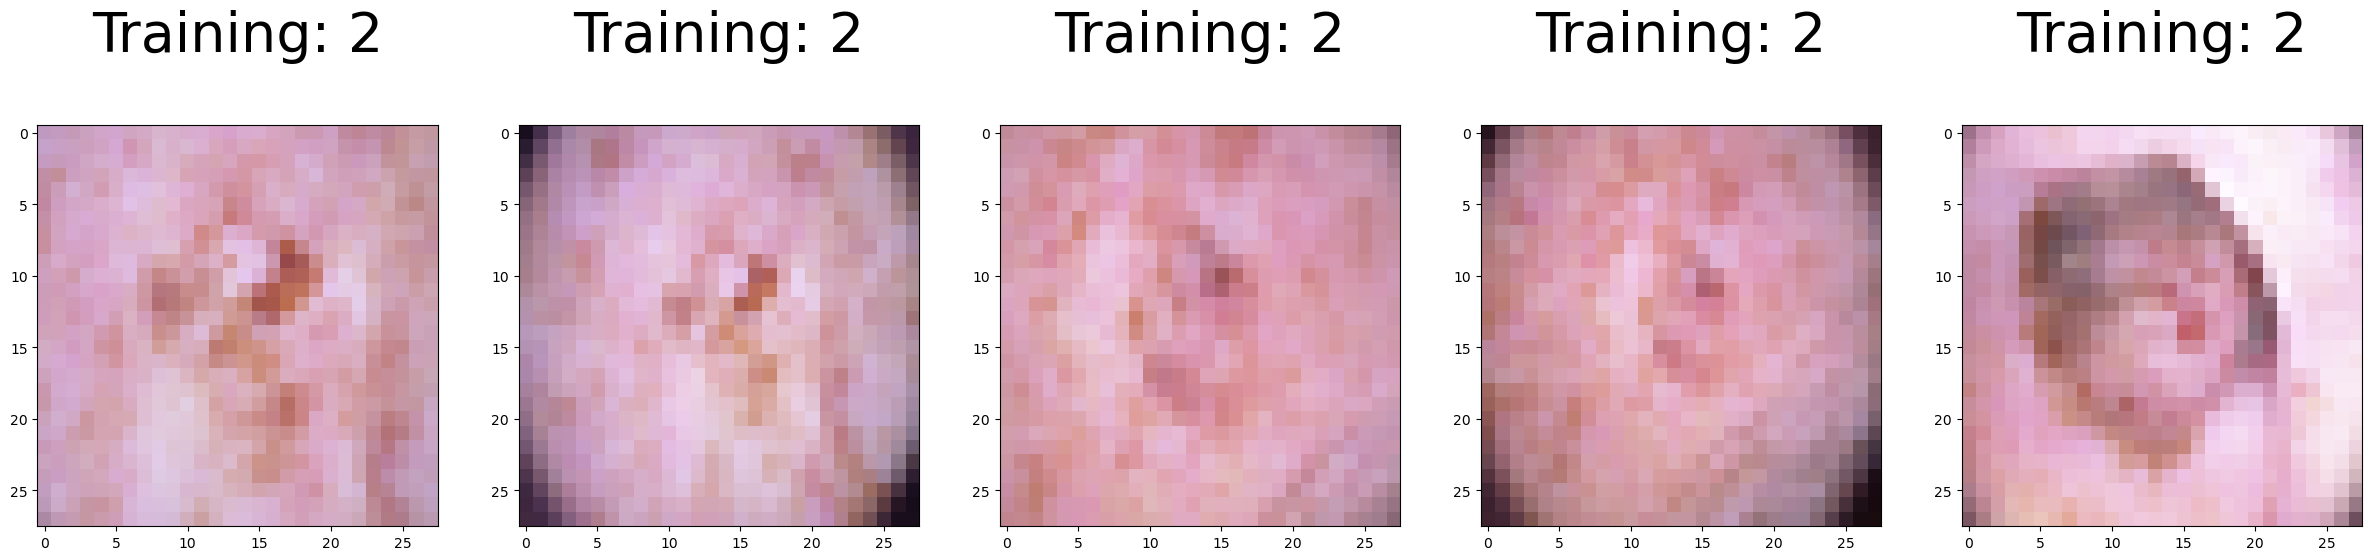

In [75]:
plt.figure(figsize=(30,7))
for index, (image, label) in enumerate(zip(X[0:5], Y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28,3)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 40)

#LDA

In [76]:
lda = LinearDiscriminantAnalysis(n_components=6)

In [77]:
x_lda= lda.fit_transform(X,Y)

C:\Users\Hamza Iqbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
type(Y)

numpy.ndarray

Splitting Data

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_lda, Y, test_size=0.20,random_state=49)

#ANN

In [80]:
# Build a simple ANN architecture (input layer = 1, hidden layers= 2, output layer= 1)
ANN_model= Sequential([

    Dense(32, activation="relu", input_shape=(6,)),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(7, activation="softmax")
])


In [81]:
# Compile the model
ANN_model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [82]:
#Train the model
s= time.time()
history=ANN_model.fit(x_train,y_train,epochs=100, batch_size= 128, validation_data=(x_test,y_test) ) # Training done on Local machine
E= time.time()

Epoch 1/100
63/63 [==============================] - 1s 11ms/step - loss: 1.8300 - accuracy: 0.1492 - val_loss: 1.6205 - val_accuracy: 0.2366
Epoch 2/100
63/63 [==============================] - 1s 9ms/step - loss: 1.3964 - accuracy: 0.4075 - val_loss: 1.1220 - val_accuracy: 0.7728
Epoch 3/100
63/63 [==============================] - 1s 9ms/step - loss: 0.8249 - accuracy: 0.7772 - val_loss: 0.6511 - val_accuracy: 0.8103
Epoch 4/100
63/63 [==============================] - 1s 9ms/step - loss: 0.5471 - accuracy: 0.8374 - val_loss: 0.5027 - val_accuracy: 0.8492
Epoch 5/100
63/63 [==============================] - 1s 9ms/step - loss: 0.4550 - accuracy: 0.8592 - val_loss: 0.4357 - val_accuracy: 0.8662
Epoch 6/100
63/63 [==============================] - 1s 9ms/step - loss: 0.4095 - accuracy: 0.8660 - val_loss: 0.4040 - val_accuracy: 0.8717
Epoch 7/100
63/63 [==============================] - 1s 9ms/step - loss: 0.3847 - accuracy: 0.8684 - val_loss: 0.3842 - val_accuracy: 0.8802
Epoch 8/100


# Evaluate the model


In [83]:
test_loss, test_acc= ANN_model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_acc}")
print("Total time take while Training ",E-s)

63/63 [==============================] - 0s 4ms/step - loss: 0.3230 - accuracy: 0.8912
Test Accuracy: 0.8911632299423218
Total time take while Training  56.4214141368866


# Visualizing Training and testing Accuracy

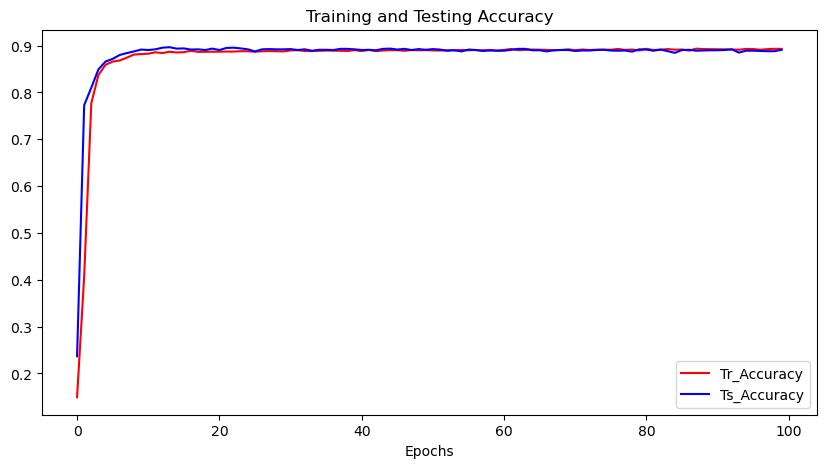

In [84]:
plt.figure (figsize=(10,5))
plt.plot(history.history ['accuracy'], label = 'Tr_Accuracy', color = 'r')
plt.plot(history.history ['val_accuracy'], label = 'Ts_Accuracy', color = 'b')
plt.title('Training and Testing Accuracy')
plt.xlabel ('Epochs')
plt.legend()
plt.show()

# Visualizing Training and testing Loss

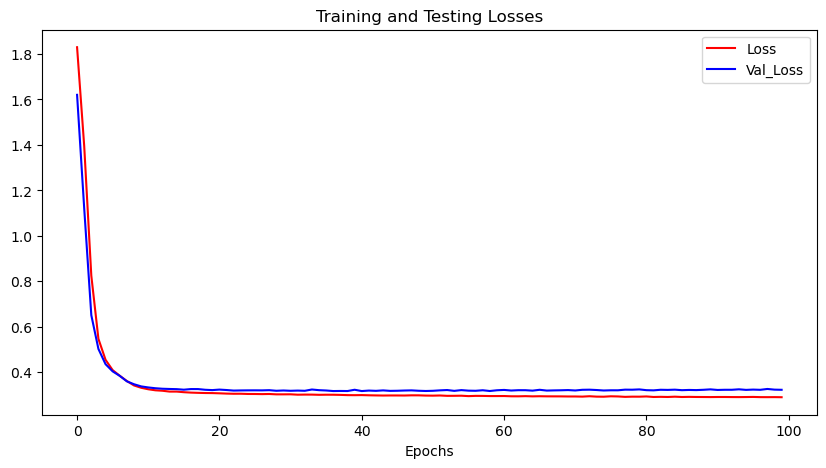

In [85]:
plt.figure (figsize=(10,5))
plt.plot(history.history ['loss'], label = 'Loss', color = 'r')
plt.plot(history.history ['val_loss'], label = 'Val_Loss', color = 'b')
plt.title('Training and Testing Losses')
plt.xlabel ('Epochs')
plt.legend()
plt.show()

#Predictions

1/1 [==============================] - 0s 18ms/step


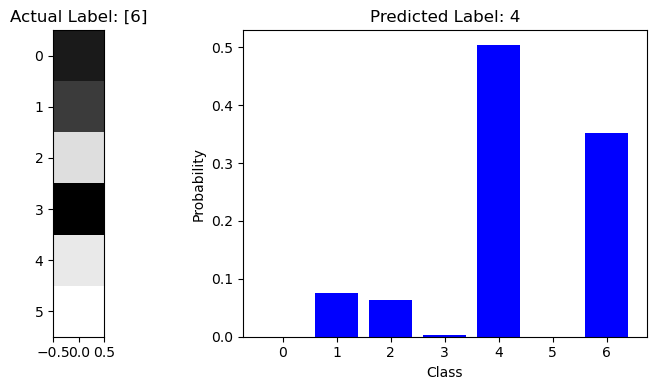

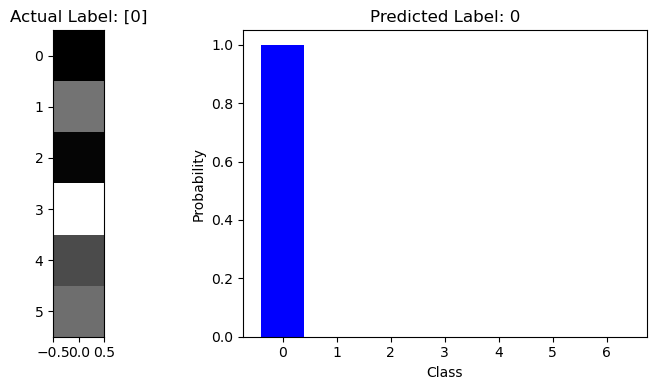

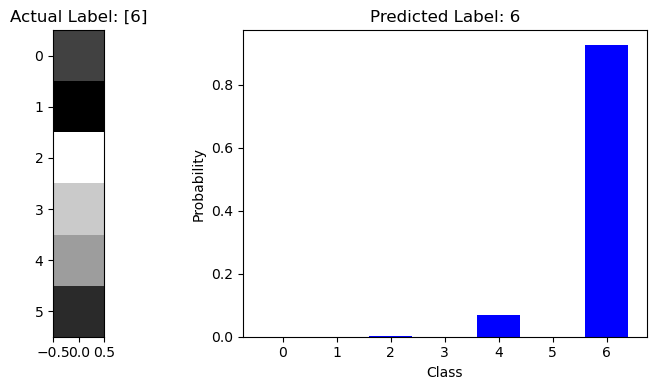

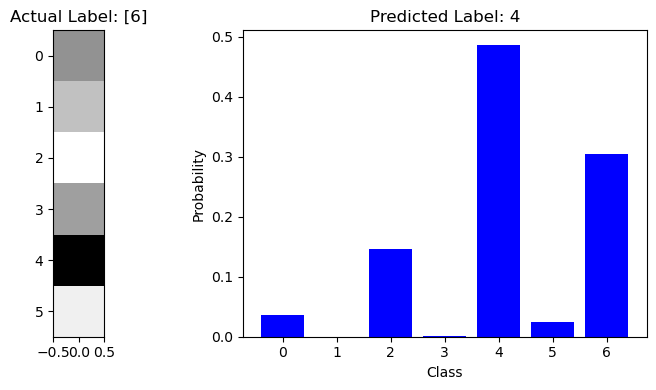

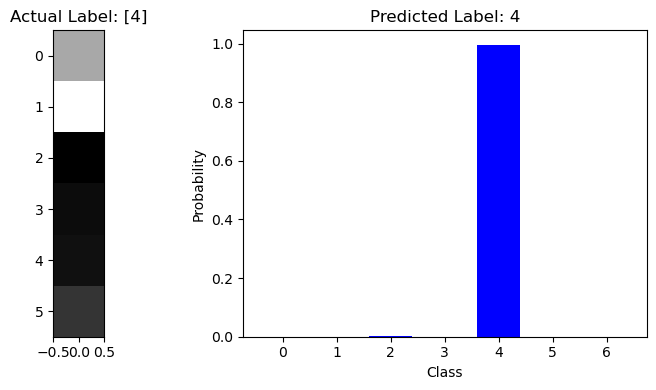

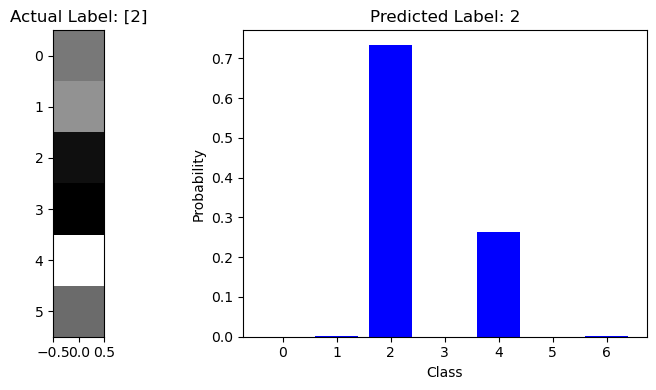

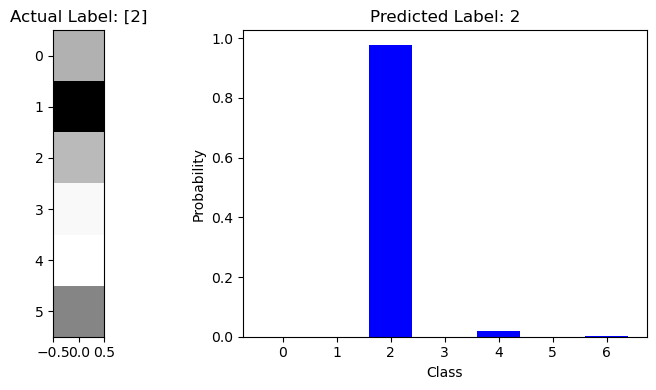

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined ANN_model and loaded x_test, y_test

for i in range(7):
    prediction = ANN_model.predict(x_test[i].reshape(1, -1))  # Reshaping to match input dimensions
    predicted_label = np.argmax(prediction)
    actual_label = y_test[i]

    plt.figure(figsize=(8, 4))

    # Plotting the image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i].reshape(6,1), cmap='gray')  # Replace your_image_shape with the actual shape
    plt.title(f"Actual Label: {actual_label}")

    # Plotting the prediction probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(7), prediction[0], color='blue')  # Replace num_classes with the number of classes in your problem
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title(f"Predicted Label: {predicted_label}")

    plt.tight_layout()

plt.show()


# **Conclusion**
In this project, I successfully implemented a Skin Disease Classification system using Artificial Neural Networks. The model was trained on a substantial dataset comprising various skin conditions and their respective labels. After reducing dimensionality with Linear Discriminant Analysis, we built a simple yet effective ANN architecture that was able to classify skin diseases with a promising level of accuracy.

While the model performed well in tests, future work could focus on further optimization through hyperparameter tuning and feature scaling to potentially improve performance. This project serves as a foundational step towards automating the diagnosis of skin conditions, making it a potentially invaluable tool in medical diagnostics.